# Quantum optimization with neutral atoms applied to MIS

Let us make sure that you have the right versions of the python package for this project. Run the next command to make sure that everything is fine

In [65]:
!pip install pulser numpy networkx pasqal-cloud pandas geopy scikit-optimize emu_sv

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


### Packages 

In [66]:
import numpy as np
import networkx as nx 
from itertools import product
import pandas as pd 
from geopy.distance import geodesic
import matplotlib.pyplot as plt


Example of a graph $G=(V, E)$

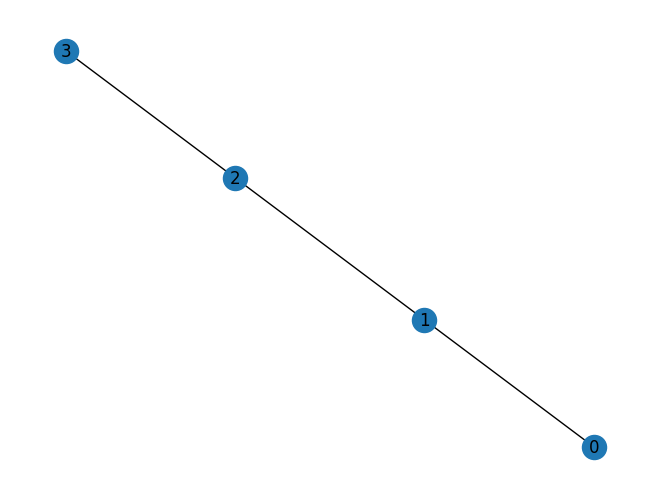

In [67]:
G=nx.path_graph(4)

nx.draw(G, with_labels=True)

A graph $G$ is usually represented by an adjacency matrix $A \in \{0;1\}^{|V| \times |V|} $ that encodes the connexion between each node:
$$\forall (i, j) \in |V|^2 : A(i, j)=\begin{cases} 1 & \text{ if } (i, j)\in E \\
0 & \text{ otherwise }
\end{cases}
$$


In [68]:
nx.adjacency_matrix(G).todense()

array([[0, 1, 0, 0],
       [1, 0, 1, 0],
       [0, 1, 0, 1],
       [0, 0, 1, 0]])

## 5G Antenna dataset

In [69]:
def distance_from_coordinates(
    coord1: tuple[float, float], coord2: tuple[float, float]
) -> float:
    """
    Calculate the distance between two geodesic coordinates.

    Args:
        coord1 (tuple[float, float]): The first coordinate as a tuple (latitude, longitude).
        coord2 (tuple[float, float]): The second coordinate as a tuple (latitude, longitude).

    Returns:
        float: The distance between the two coordinates in kilometers.
    """
    return float(geodesic(coord1, coord2).km)


def graph_antenna(
    df: pd.DataFrame,
    num_nodes: int | None = None,
    antenna_range: float = 1.2,
    seed: int = 2352456,
):
    coordinates_dataset = [
        (float(c.split(",")[0]), float(c.split(",")[1]))
        for c in df["coordonnees"]
    ]

    N = len(coordinates_dataset)
    np.random.seed(seed)

    if num_nodes is None or num_nodes == N:
        selected = list(range(N))
    else:
        selected = list(
            np.random.choice(N, size=num_nodes, replace=False)
        )

    relabel = {old: new for new, old in enumerate(selected)}

    graph = nx.Graph()

    for idx_i, i in enumerate(selected):
        graph.add_node(relabel[i])
        for j in selected[idx_i + 1 :]:
            if (
                distance_from_coordinates(
                    coordinates_dataset[i],
                    coordinates_dataset[j],
                )
                <= antenna_range
            ):
                graph.add_edge(relabel[i], relabel[j])

    return graph



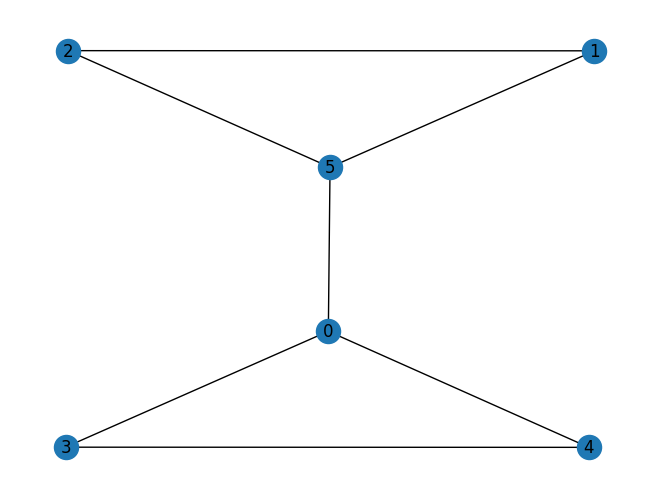

In [70]:
antennas_dataset=pd.read_csv('antenna_Paris.csv', sep=";")

antenna_range=4.5

G=graph_antenna(antennas_dataset, 6,  antenna_range, seed=2352456)
nx.draw(G, with_labels=True)

## TASK 1 -- Classical

An independent set of a graph $G=(V, E)$ is a subset $S \subset V$ such that $\forall (x, y) \in S, (x, y) \notin E$

Remember that the cost function for the MIS problem for a graph $G=(V, E)$ is given by
$$ \forall z \in \{0;1\}^N : C(z_1, \ldots, z_N)=-\sum_{i=1}^N z_i + U \sum_{(i, j)\in E} z_i z_j$$

with $U \gg 1$ . In practice, we take $U \gg \Delta(G)$ for $\Delta(G)$ the maximum degree of the graph $G$.


Implement a python code to compute this cost function. To get used to this cost function you can use the simplest example of path graph

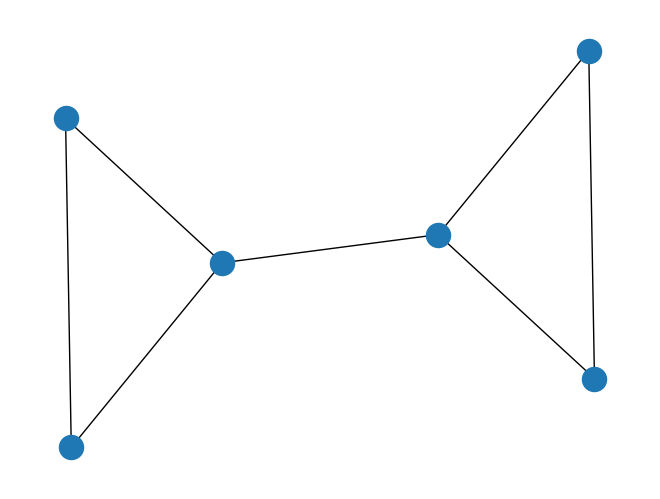

In [71]:
# G=graph_antenna(antennas_dataset, num_nodes=7, antenna_range=4)
nx.draw(G)


In [ ]:
def cost_MIS(z, G, U):
    """Quadratic MIS objective (to be minimized).

    We encode a candidate set S by a bitstring z where z[i]=1 means vertex i is selected.

    The standard cost function for MIS is:
        C(z) = -\sum_i z_i + U \sum_{(i,j) in E} z_i z_j

    For U > 1 (typically U >= \Delta+1 where Δ is max degree), any non-independent set is
    penalized enough that the minimizer corresponds to a maximum independent set.

    Args:
        z: Iterable of 0/1 of length |V|.
        G: NetworkX graph whose nodes are labeled 0..|V|-1.
        U: Penalty strength (positive).

    Returns:
        The cost value (float).
    """
    raise NotImplementedError


def maximum_degree(G):
    """Return the maximum vertex degree Δ of the graph."""
    raise NotImplementedError


<>:2: DeprecationWarning: invalid escape sequence '\s'
<>:2: DeprecationWarning: invalid escape sequence '\s'
/var/folders/q8/f0wlmxvd7nvgnp61_lvspjqr0000gp/T/ipykernel_26950/2945538774.py:2: DeprecationWarning: invalid escape sequence '\s'
  """Quadratic MIS objective (to be minimized).


Play around the value of the cost function for independent sets and for non-independent sets and plot the value of the cost function for all independent sets and for non-independents 

In [ ]:
def is_independent_set(S, G):
    """Check whether a bitstring encodes an independent set.

    Args:
        S: bitstring as e.g. "0101", list[int], tuple[int], np.ndarray...
        G: NetworkX graph (nodes 0..|V|-1).

    Returns:
        True iff selected vertices contain no edge.
    """
    raise NotImplementedError



def plot_IS_vs_nonIS(G):
    """Visualize how the cost separates IS from non-IS bitstrings."""
    raise NotImplementedError


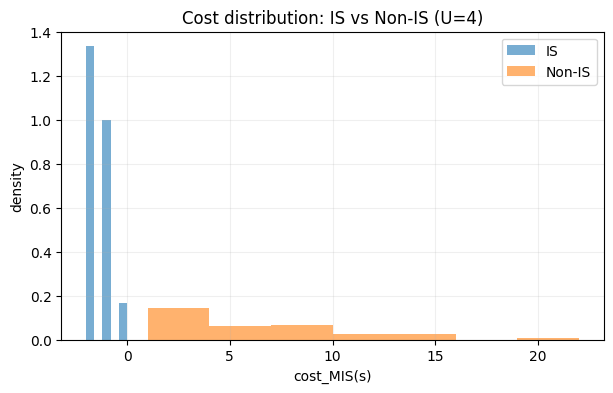

In [74]:
fig, ax=plot_IS_vs_nonIS(G)

Brute force to find the value of the maximum independent set and its size. 

In [ ]:
## Brute-force method:

def brute_force_MIS(G):
    """Compute a maximum independent set by exhaustive search.

    Returns:
        (bitstring_as_list[int], size)
    """
    raise NotImplementedError



def brute_force_all_MIS(G):
    """Return all maximum independent sets as an array of bitstrings."""
    raise NotImplementedError



brute_force_MIS(G)
brute_force_all_MIS(G)

array([[0, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0]])

## TASK 2 -- Quantum

Neutral atom platforms are characterized by the evolution under the Hamiltonian, for $N$ atoms:

$$H(t)=\sum_{i=1}^N \Omega_i(t) X_i - \sum_{i=1}^N \delta_i(t) n_i + \sum_{i<j} \frac{C_6}{|r_i -r_j|^6} n_i n_j$$

for $n_i = \frac{1}{2}(Id-Z_i)$ and $r_i$ correspond to the position of the atom $i$. 



### First steps in Pulser

We will mostly use Pulser as the python package for neutral atom simulations. 

In [ ]:
from pulser import Pulse, Sequence, Register
from pulser.devices import MockDevice, AnalogDevice
from pulser import waveforms
import pulser as pl 
import matplotlib.pyplot as plt
import numpy as np

We first need to generate a register, i.e. a set of atom positions that are fixed through their coordinates for example. 

/Users/eliebermot/Library/Python/3.10/lib/python/site-packages/pulser/register/register.py:58: DeprecationWarning: Usage of `int`s or any non-`str`types as `QubitId`s will be deprecated. Define your `QubitId`s as `str`s, prefer setting `prefix='q'` when using classmethods, as that will become the new default once `int` qubit IDs become invalid.
  super().__init__(qubits, **kwargs)


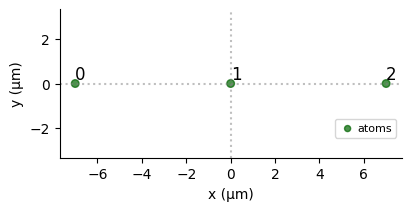

In [77]:
coords = [[-7, 0], [0,0], [7,0]]
reg = Register.from_coordinates(coords)
reg.draw()

Once generated, we then need to specify the operations i.e. the $(\Omega(t), \delta(t))$ that we apply to our neutral atoms, now mapped into a register.  This is what we call a schedule. 
We first need to specify the device (i.e. the quantum computer on which we are running our computations), the amplitude and the detuning 

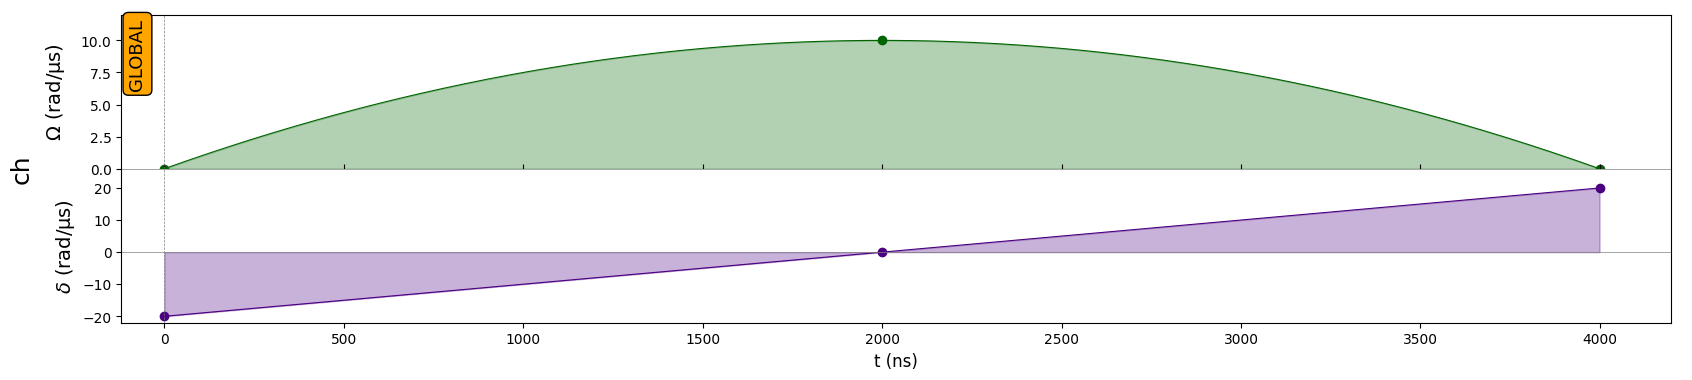

In [78]:
seq = Sequence(reg, MockDevice)

seq.declare_channel('ch', 'rydberg_global')

amplitude = waveforms.InterpolatedWaveform(4000, [0,10,0])
detuning = waveforms.InterpolatedWaveform(4000, [-20,0,20])
pulse = Pulse(amplitude, detuning, 0)

seq.add(pulse, 'ch')
seq.draw()

In [79]:
sim=pl.backends.QutipBackendV2(seq)
result = sim.run()

In [80]:
# a measurement of the final state will give the MIS of the graph with
# almost 100% probability
result.final_bitstrings

Counter({'101': 998, '001': 2})

### Solving the MIS on a given graph

The first goal with neutral atoms is to find out if we can represent our graph with neutral atom positions. 
For $\Omega=0$ and $\delta_f >0$, if we want that the ground state encodes the MIS of a graph $G$, we need that the ground state of $$H_{MIS}= -\sum_{i=1}^N n_i + U\sum_{(i, j) \in E} n_i n_j $$

matches the ground state of 
$$H_{Ryd}(\Omega=0, \delta_f)= -\delta_f \sum_{i=1}^N n_i + \sum_{i<j} \frac{C_6}{|r_i - r_j|^6} n_i n_j.$$

To do that, we mostly need to change the $\{r_i\}$ such that it could encode the graph at hand. One approach that we will do here is to minimize the distance between the adjacency matrix of the graph and the interaction matrix $(C_6/|r_i - r_j|^6)_{i\neq j}$. 

In [ ]:
from scipy.optimize import minimize
from scipy.spatial.distance import pdist, squareform


def encoding(G, device):
    raise NotImplementedError



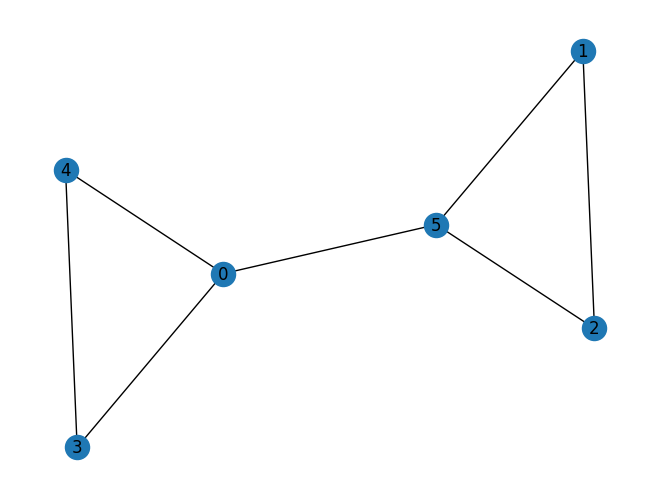

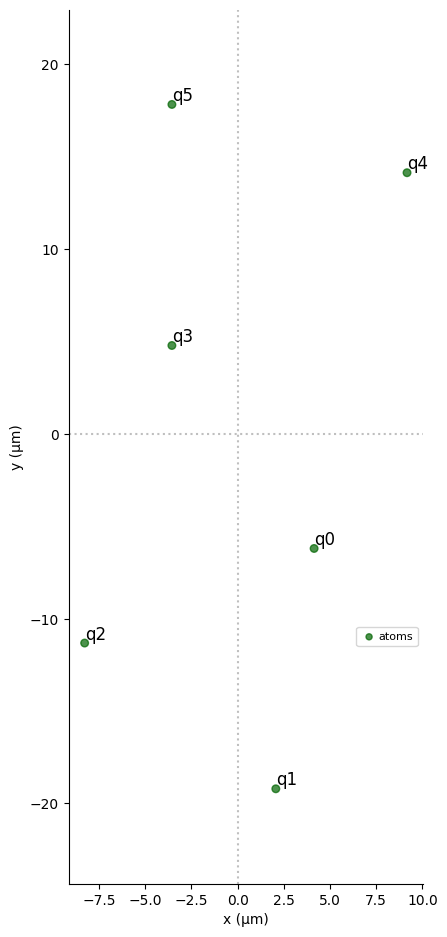

In [82]:
reg=encoding(G, MockDevice)
nx.draw(G, with_labels=True)
reg.draw()

Once you have found the optimal positions of the atoms, you then need to optimize the schedule for the graph.

Fill out the MIS_solver function, for fixed final time, give you the probability of finding the MIS on a graph. 
PLot the probability of finding this probability w.r.t. T. 
If you have done the right choices, the probability should go to 1 as $T \rightarrow \infty$

In [ ]:
def PMIS(result: dict, G: nx.Graph) -> float:
    """Probability of sampling a maximum independent set (PMIS).

    Args:
        result: a mapping bitstring -> counts (from Pulser/Qutip results).
                Bitstrings can be strings like "0101" or iterable of bits.
        G: Graph.

    Returns:
        Probability mass on *maximum* independent sets.
    """
    raise NotImplementedError



def MIS_exp(reg, G, omega, delta, T):
    """Run a simple annealing-like pulse and return PMIS."""
    raise NotImplementedError



def plot_MIS(reg, G, omega, delta, T_list):
    """Plot PMIS as a function of pulse duration T."""
    raise NotImplementedError


/Users/eliebermot/Library/Python/3.10/lib/python/site-packages/pulser/register/register.py:58: DeprecationWarning: Usage of `int`s or any non-`str`types as `QubitId`s will be deprecated. Define your `QubitId`s as `str`s, prefer setting `prefix='q'` when using classmethods, as that will become the new default once `int` qubit IDs become invalid.
  super().__init__(qubits, **kwargs)


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='T', ylabel='PMIS'>)

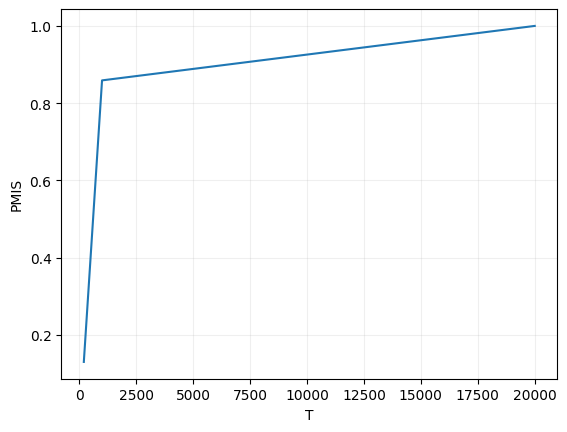

In [84]:
plot_MIS(Register.from_coordinates([[-7, 0], [0,0], [7,0]]), nx.path_graph(3), 10, 20, [200, 1000, 20000])

However, this last pulse is not necessarily the best one for any graph. For this shape of pulse and the given final time, implement a code to find the optimal omega and initial/final detuning to maximise $P_{MIS}$

In [ ]:
import skopt

def optimize_PMIS(reg, G, T, bounds=None, n_calls=30, random_state=2353425):
    """Bayesian optimization(or any type of optimization) of (omega, delta) to maximize PMIS at fixed T."""
    raise NotImplementedError


In [101]:
omega_opt, delta_opt , _ =optimize_PMIS(reg, G, 1000)
MIS_exp(reg, G, omega_opt, delta_opt, 1000)

/Users/eliebermot/Library/Python/3.10/lib/python/site-packages/skopt/optimizer/base.py:250: DeprecationWarning: n_random_starts will be removed in favour of n_initial_points. It overwrites n_initial_points.
  warnings.warn(
/Users/eliebermot/Library/Python/3.10/lib/python/site-packages/pulser/waveforms.py:977: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


0.2

Also try to optimize every parameter, including the optimal time to find the best MIS.


In [ ]:
import skopt

def optimize_PMIS_everything(reg, G, bounds=None, n_calls=40, random_state=2353425):
    """Bayesian optimization of (omega, delta, T) to maximize PMIS."""
     raise NotImplementedError


omega_opt, delta_opt, T_opt, pmis_opt = optimize_PMIS_everything(reg, G)

/Users/eliebermot/Library/Python/3.10/lib/python/site-packages/skopt/optimizer/base.py:250: DeprecationWarning: n_random_starts will be removed in favour of n_initial_points. It overwrites n_initial_points.
  warnings.warn(
/Users/eliebermot/Library/Python/3.10/lib/python/site-packages/pulser/waveforms.py:977: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)
/Users/eliebermot/Library/Python/3.10/lib/python/site-packages/pulser/waveforms.py:977: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)
/Users/eliebermot/Library/Python/3.10/lib/python/site-packages/pulser/waveforms.py:977: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)
/Users/eliebermot/Library/Python/3.10/lib/python/site-packages/pulser/waveforms.py:977: RuntimeWarning: divide by zero encountered in log10
  min(np.fin

In [88]:
MIS_exp(reg, G, omega_opt, delta_opt, T_opt)

0.23

Naturally as the size of the graph scales up, it seems to be complicated to always try to optimize the different parameters of the pulse. We can also rely on heuristics. One of them is the following: 
We define these two quantities: $U_{min} = \min_{(i, j)\in E} \frac{C_6}{|r_i - r_j|^6}$ and $U_{max}=\max_{(i, j) \notin E} \frac{C_6}{|r_i - r_j|^6}$
We pick $\Omega_{max}= U_{max} + 0.8(U_{min} - U_{max}) $ and $\delta_f = -\delta_0= \frac{\Delta(G)}{\Delta(G)+1} U_{min}$. 

Implement this heuristics and replot PMIS versus T. 

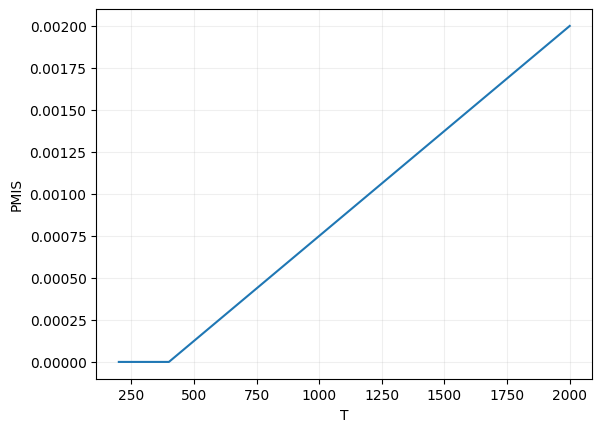

In [ ]:
d_max = maximum_degree(G)

from scipy.spatial.distance import euclidean


def get_interactions(
    pos: np.ndarray, graph: nx.Graph, device
):
    """Calculate the interaction strengths for connected and disconnected nodes.

    Args:
        pos (np.ndarray): The position of the nodes.
        graph (nx.Graph): The associated graph.
        device (BaseDevice): Device used to calculate interaction coeff.

    Returns:
        tuple[list[Any], list[Any]]: Connected interactions, Disconnected interactions
    """

    raise NotImplementedError



def interaction_bounds(pos: np.ndarray, graph: nx.Graph, device):
    """Calculates U_min and U_max given the positions. It uses the edges of the
    graph. U_min corresponds to minimal energy of two nodes connected in the
    graph. U_max corresponds to maximal energy of two nodes NOT connected in
    the graph."""
    raise NotImplementedError

def heuristics(reg, G, device):
    """Calculates the omega and delta heuristics given as 
    Omega = U_max + 0.8 (U_min-U_max)
    delta = \Delta(G)/(\Delta(G)+1)
    """
    raise NotImplementedError

delta_heuristic, omega_heuristic= heuristics(reg, G, MockDevice)

fig, ax=plot_MIS(reg, G, omega_heuristic, delta_heuristic , [200, 400, 2000])

Try to replicate the preivous work but with another pulse shape. Look up online or on Pulser documentation. 

In [ ]:
from pulser.waveforms import InterpolatedWaveform

def create_opt_pulse(T, amp_points, det_points):
    """Convenience helper to build a smooth pulse from control points.

    amp_points: list of amplitudes (excluding endpoints, which are ~0)
    det_points: list of detunings (length = len(amp_points)+2 or any you want)
    """
    raise NotImplementedError


def optimize_opt_pulse(reg, G, n_calls=60, random_state=2353425):
    """Example: optimize a pulse with 3 amplitude control points and 3 detuning points.

    Parameterization:
        params = [T, a1, a2, a3, d0, d1, d2]
    """
    raise NotImplementedError

In [ ]:
optimize_opt_pulse(reg, G)

/Users/eliebermot/Library/Python/3.10/lib/python/site-packages/skopt/optimizer/base.py:250: DeprecationWarning: n_random_starts will be removed in favour of n_initial_points. It overwrites n_initial_points.
  warnings.warn(


## Task 3 - Analog Device 

In real life, you cannot run schedules on a mock device, you need to adapt to the constraint of a real device. For the rest of this task, you will consider the device AnalogDevice

Try to replicate your previous work but with the constraints of the MockDevice.

In [ ]:
device = AnalogDevice
reg_analog = encoding(G, device)

def MIS_exp_device(reg, device, G, omega, delta, T):
    """Same as MIS_exp, but using a provided device."""
    raise NotImplementedError


def plot_MIS_device(reg, device, G, omega, delta, T_list):
    raise NotImplementedError

/Users/eliebermot/Library/Python/3.10/lib/python/site-packages/pulser/sequence/sequence.py:1371: UserWarning: A duration of 50 ns is not a multiple of the channel's clock period (4 ns). It was rounded up to 52 ns.
  self._add(pulse, channel, protocol)


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='T', ylabel='PMIS'>)

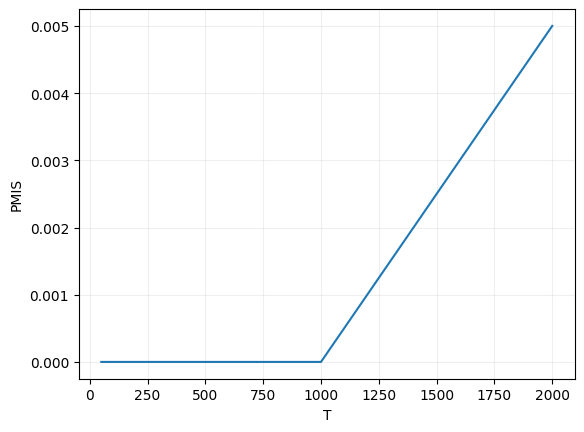

In [ ]:
plot_MIS_device(reg, device, G, omega_opt, delta_opt, [50, 1000, 2000])

In [ ]:
import skopt

def optimize_PMIS_device(reg, device, G, T, n_calls=40, random_state=2353425):
    """Optimize (omega, delta) within device constraints."""
      raise NotImplementedError

## Task 4 - Scale up with more qubits -- Cloud jobs

In [ ]:
from pasqal_cloud import SDK
from pasqal_cloud.device import DeviceTypeName


sdk = SDK(
    username="your username",# Your username or email address for the Pasqal Cloud Platform
    project_id="your project-id" , # The ID of the project associated to your account 
    password="your password"  # The password for your Pasqal Cloud Platform account
)



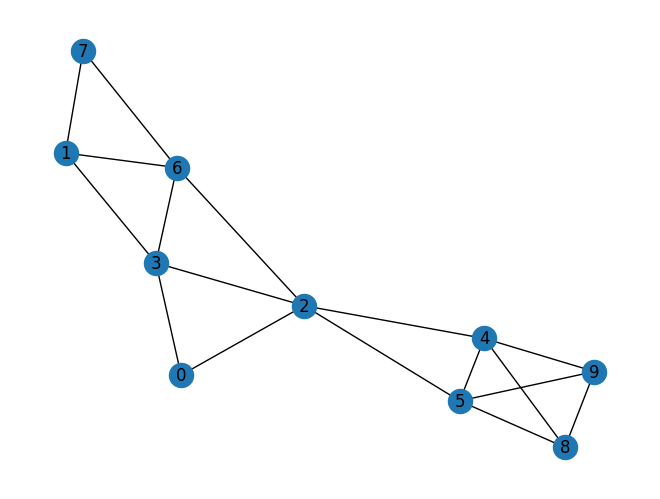

In [95]:
G_scale_up=graph_antenna(antennas_dataset, 10, 4.3,  seed=2345)
nx.draw(G_scale_up, with_labels=True)


In [ ]:
import os

def MIS_cloud(G, device, username=None, project_id=None, password=None):
    """Submit an MIS sequence to Pasqal Cloud (requires credentials).

    For teaching purposes, we keep credentials OUT of the notebook.
    Provide them explicitly (or via environment variables) when you run this cell.

    Args:
        username, project_id, password: Pasqal Cloud Platform credentials.

    Returns:
        A created batch object.
    """
    if username is None:
        username = os.environ.get("PASQAL_CLOUD_USERNAME")
    if project_id is None:
        project_id = os.environ.get("PASQAL_CLOUD_PROJECT_ID")
    if password is None:
        password = os.environ.get("PASQAL_CLOUD_PASSWORD")

    if not (username and project_id and password):
        raise ValueError(
            "Missing cloud credentials. Set PASQAL_CLOUD_USERNAME / "
            "PASQAL_CLOUD_PROJECT_ID / PASQAL_CLOUD_PASSWORD environment variables "
            "or pass them as function arguments."
        )

    sdk = SDK(username=username, project_id=project_id, password=password)

    #YOUR CODE

    jobs = [{"runs": 20}, {"runs": 50}]
    return sdk.create_batch(
        seq.to_abstract_repr(),
        jobs=jobs,
        device_type=DeviceTypeName.EMU_FREE,
    )

# Example (requires credentials in env vars):
batch = MIS_cloud(G_scale_up, MockDevice, username="your username",
    project_id="your project ID" ,
    password="your password")

In [97]:
for job in batch.ordered_jobs:
    print(f"job-id: {job.id}, status: {job.status}, result: {job.result}")



job-id: a2fd72db-a28b-4140-b52f-9970ee0b68c6, status: PENDING, result: None
job-id: 922bc1a3-6cf5-4662-a28a-64b9c14e4c12, status: PENDING, result: None


In [98]:
batch.ordered_jobs.result

AttributeError: 'list' object has no attribute 'result'

When the result is not None, you can then compute $P_{MIS}$. You can also check online the result on the Portal! 

In [ ]:
PMIS(batch.ordered_jobs[0].result, G_scale_up)

AttributeError: 'NoneType' object has no attribute 'values'